# Plot terminus picks over images analyzed

#### Jukes Liu

### Import packages, set paths, and read in image dates

Must install cv2 module.

In [4]:
import sys
# !{sys.executable} -m pip install fiona
!{sys.executable} -m pip install opencv-python

    100% |████████████████████████████████| 26.6MB 3.0MB/s eta 0:00:01


In [247]:
import numpy as np
import os
import matplotlib.pyplot as plt
import matplotlib.pylab as pl
import matplotlib.image as mpimg
import cv2
import pandas as pd    
from time import sleep
from IPython.display import clear_output
import scipy.stats
import datetime

Read in image dates as date strings:

In [266]:
#Read in datetags csv as datetime_df
datetime_df = pd.read_csv('/home/jukes/Documents/Sample_glaciers/datetags.csv', sep=',', dtype=str, header=0, names=['Scene', 'datetimes'])
datetime_df.head()

,Scene,datetimes
0,LC80360042017077LGN00,2017-03-18
1,LC80360042015248LGN00,2015-09-05
2,LC80360042015184LGN00,2015-07-03
3,LC80360042016107LGN00,2016-04-16
4,LC80360042015232LGN00,2015-08-20


## _Plot trimmed vs. original terminus picks_

In [27]:
# BoxID = '001'
# metric = "terminus_highestmass/"
# basepath = '/media/jukes/jukes1/LS8aws/'
# imagepath = basepath+"Box"+BoxID+"/rotated/resized/"

# #GRAB LIST OF IMAGENAMES
# imagenames = []

# imagelist = os.listdir(imagepath)
# for image in imagelist:
#     if image.endswith(BoxID+".png"):
#         imagename = image[:-4]
# #         print(imagename)
#         imagenames.append(imagename)
# # print(imagenames)

# #GRAB DAT FILES
# dats = []
# trimdats = []
# imgnames = []
# tot_counter = 0
# fin_counter = 0

# for image in imagenames:
#     tot_counter = tot_counter+1
# #     print(image)
#     datpath = imagepath+image+".pgm_max_gaussian/"+metric
#     datfiles = os.listdir(datpath)
# #     print(datfiles)
#     if len(datfiles) > 0:
#         #only append the imagename to the list and incr the final conuter if datfiles were created for the img
#         imgnames.append(image)
#         fin_counter = fin_counter+1
        
#         #find the trimmed dat file and the original
#         for dat in datfiles:
#             if "trim" in dat:
#                 datfile_trim = dat
#                 trimdats.append(datfile_trim)
#             else:
#                 datfile = dat
#                 dats.append(datfile)
                
#         print(image, datfile_trim, datfile)
        
# print("Chain found for: ", fin_counter, "out of", tot_counter)
# # print(len(imgnames), len(trimdats), len(dats))

In [26]:
# for i in range(0, len(imgnames)):
#     imagename = imgnames[i]
#     dat = dats[i]
#     trimdat = trimdats[i]

#     #Read in image as np array
#     image = mpimg.imread(imagepath+imagename+'.png')
    
#     datpath = imagepath+imagename+".pgm_max_gaussian/"+metric
    
#     #Read in dat file as np array and grab x and y values
#     #TRIMMED:
#     term_trim_dat = np.loadtxt(datpath+trimdat)
#     #ORIGINAL:
#     term_dat = np.loadtxt(datpath+dat)

#     #ORIGINAL
#     term_xs = []
#     term_ys = []

#     #grab x and y values for the terminus line
#     for j in term_dat:
#         x, y = (j[0], j[1])
#         term_xs.append(x)
#         term_ys.append(y)

#     #TRIMMED
#     term_trim_xs = []
#     term_trim_ys = []

#     #grab x and y values for the terminus line
#     for j in term_trim_dat:
#         x, y = (j[0], j[1])
#         term_trim_xs.append(x)
#         term_trim_ys.append(y)

    
#     #plot image and terminus line from dat
#     imgplt = plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
#     plt.plot(term_xs, term_ys, c='orange')
#     plt.axis("off")
#     # plt.savefig('/home/jukes/Documents/seethrucloud_'+imagename1+"2.png", dpi=2000)
#     plt.show()

#     imgplt_trim = plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
#     plt.plot(term_trim_xs, term_trim_ys, c='red')
#     plt.axis("off")
#     # plt.savefig('/home/jukes/Documents/seethrucloud_'+imagename1+"2.png", dpi=2000)
#     plt.show()

## Plot all terminus picks and centroid for one BoxID sequentially

If images have not been converted to png from pgm, run the following cell but change the BoxID to the right ID:

In [217]:
%%bash

cd /media/jukes/jukes1/LS8aws/Box531/rotated/resized/
mogrify -format png *.pgm

Read in csv file with terminus positions and change rates

In [272]:
# massorsize = "mass"
terminus_df = pd.read_csv('/home/jukes/Documents/Sample_glaciers/terminuschange_2019_09_03_'+massorsize+'.csv', sep=',', header=0, dtype=str, index_col=0)
print(terminus_df.shape)
terminus_df.head()

(884, 10)


,BoxID,Scene,Mid_X,Mid_Y,datetimes,xdist_leftmost,xdist_midpoint,changerates,Cloudpercent,Avgpixel_percent
0,001,LC80320052013134LGN03,169.0,149.0,2013-05-14,825.0,780.0,38.333333333333336,0.0,43
1,001,LC80330052013141LGN01,184.0,153.0,2013-05-21,1050.0,1005.0,32.142857142857146,0.6,40
2,001,LC80360042013146LGN00,145.0,160.0,2013-05-26,465.0,420.0,-117.0,0.0,49
3,001,LC80340052013148LGN00,145.0,160.0,2013-05-28,465.0,420.0,0.0,0.4,44
4,001,LC80310052013239LGN00,140.0,158.0,2013-08-27,390.0,345.0,-0.8241758241758241,0.6,26


Load in the images, dat files for the terminus pick, and trimmed dat files as well as the date:

In [486]:
BOI= '235'
print("Box"+BOI)
massorsize = "mass"
metric = "terminus_highest"+massorsize+"/"
basepath = '/media/jukes/jukes1/LS8aws/'
imagepath = basepath+"Box"+BOI+"/rotated/resized/"

#make results directory in BoxID folder if it doesn't already exist
if os.path.exists(basepath+"Box"+BOI+"/Results/"):
    print("RESULTS FOLDER EXISTS ALREADY. SKIP.")
#OTHERWISE, create the folder and download into it
else:
    os.mkdir(basepath+"Box"+BOI+"/Results/")
    print("Results  folder made")

#make lists to store image data and grab image files
imgfiles = os.listdir(imagepath)
# images = []
# term_dats = []
# imgnames = []
image_arrays = []
dats = []
trimdats = []
imgnames = []
boxids = []

for imgfile in imgfiles:
    #grab image files and append to images list
    if imgfile.endswith(BOI+".png"):
#         print(imgfile)
        image = mpimg.imread(imagepath+imgfile)
        imgname = imgfile[0:-4]
        scenename = imgname[7:-16]
        pathtodat = imagepath+imgname+".pgm_max_gaussian/"+metric
        datfiles = os.listdir(pathtodat)
        
        #if there are datfiles and not cloudy, grab the trimmed and non-trimmed files
        if len(datfiles) > 1: #and avgpix_val < avgpix_thresh and skew > -0.80:
            #append the image array and the image name to the list
            image_arrays.append(image)
            imgnames.append(scenename)
            boxids.append(BOI)
            
            #find the trimmed dat file and the original
            for dat in datfiles:
                if "trim" in dat:
                    datfile_trim = dat
                    trimdats.append(datfile_trim)
                else:
                    datfile = dat
                    dats.append(datfile)

#         print(image, datfile_trim, datfile)
#         else:
#             print("NO DAT FILES CREATED FOR TERMINUS PICK")

print(len(image_arrays), len(dats), len(trimdats), len(imgnames),len(boxids))
images_df = pd.DataFrame(list(zip(imgnames, boxids, image_arrays, dats, trimdats)),
              columns=['Scene','BoxID','Image_array', 'Dat_filename', "Trimmed_dat_filename"])

Box235
RESULTS FOLDER EXISTS ALREADY. SKIP.
124 124 124 124 124


In [487]:
print(images_df.shape)
images_df.head()

(124, 5)


,Scene,BoxID,Image_array,Dat_filename,Trimmed_dat_filename
0,LC82320152014178LGN00,235,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",terminus_highestmass_033.dat,terminus_highestmass_trim_033.dat
1,LC80010152016230LGN00,235,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",terminus_highestmass_043.dat,terminus_highestmass_trim_043.dat
2,LC80010152016022LGN00,235,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",terminus_highestmass_005.dat,terminus_highestmass_trim_005.dat
3,LC82320152013271LGN00,235,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",terminus_highestmass_041.dat,terminus_highestmass_trim_041.dat
4,LC82330152016271LGN00,235,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",terminus_highestmass_004.dat,terminus_highestmass_trim_004.dat


Join date to images_df by joining on index (Img_Date or Scene):

In [488]:
images_df.sort_values(by='Scene')
datetime_df = datetime_df.sort_values(by='Scene')

print(datetime_df.shape)
datetime_df.head()

(1687, 2)


,Scene,datetimes
1123,LC80010142013109LGN01,2013-04-19
1140,LC80010142013141LGN01,2013-05-21
1125,LC80010142013237LGN00,2013-08-25
1157,LC80010142013269LGN00,2013-09-26
1137,LC80010142013285LGN00,2013-10-12


In [489]:
new_df = images_df.merge(datetime_df, how= 'inner', on = 'Scene')
dated_images_df = new_df.sort_values(by='datetimes')
print(dated_images_df.shape)
dated_images_df.head()

(124, 6)


,Scene,BoxID,Image_array,Dat_filename,Trimmed_dat_filename,datetimes
77,LC82320152013111LGN01,235,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",terminus_highestmass_015.dat,terminus_highestmass_trim_015.dat,2013-04-21
31,LC82330152013118LGN01,235,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",terminus_highestmass_048.dat,terminus_highestmass_trim_048.dat,2013-04-28
84,LC82330152013134LGN01,235,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",terminus_highestmass_030.dat,terminus_highestmass_trim_030.dat,2013-05-14
119,LC80010152013141LGN01,235,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",terminus_highestmass_028.dat,terminus_highestmass_trim_028.dat,2013-05-21
115,LC82330152013230LGN00,235,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",terminus_highestmass_048.dat,terminus_highestmass_trim_048.dat,2013-08-18


Combine with terminus df

In [490]:
dated_images_df = terminus_df.merge(dated_images_df, how = 'inner', on = ['Scene', 'BoxID'])
#drop the rows with Nans
# dated_images_df = dated_images_df.dropna()
# dated_images_df = dated_images_df.set_index('Scene')
print(dated_images_df.shape)
dated_images_df.head(10)

(115, 14)


,BoxID,Scene,Mid_X,Mid_Y,datetimes_x,xdist_leftmost,xdist_midpoint,changerates,Cloudpercent,Avgpixel_percent,Image_array,Dat_filename,Trimmed_dat_filename,datetimes_y
0,235,LC82330152013118LGN01,240.0,219.0,2013-04-28,1035.0,945.0,-42.857142857142854,1.9,43,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",terminus_highestmass_048.dat,terminus_highestmass_trim_048.dat,2013-04-28
1,235,LC82330152013134LGN01,182.0,225.0,2013-05-14,165.0,75.0,-54.375,1.3,64,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",terminus_highestmass_030.dat,terminus_highestmass_trim_030.dat,2013-05-14
2,235,LC80010152013141LGN01,240.0,220.0,2013-05-21,1035.0,945.0,124.28571428571429,0.0,46,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",terminus_highestmass_028.dat,terminus_highestmass_trim_028.dat,2013-05-21
3,235,LC82330152013230LGN00,283.0,228.0,2013-08-18,1680.0,1590.0,7.247191011235955,0.3,32,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",terminus_highestmass_048.dat,terminus_highestmass_trim_048.dat,2013-08-18
4,235,LC80010152013237LGN00,277.0,226.0,2013-08-25,1590.0,1500.0,-12.857142857142858,0.1,33,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",terminus_highestmass_049.dat,terminus_highestmass_trim_049.dat,2013-08-25
5,235,LC82330152013246LGN00,240.0,218.0,2013-09-03,1035.0,945.0,-61.666666666666664,0.2,33,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",terminus_highestmass_022.dat,terminus_highestmass_trim_022.dat,2013-09-03
6,235,LC82320152013255LGN00,188.0,206.0,2013-09-12,255.0,165.0,-86.66666666666667,0.1,28,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",terminus_highestmass_043.dat,terminus_highestmass_trim_043.dat,2013-09-12
7,235,LC80010152013269LGN00,215.0,193.0,2013-09-26,660.0,570.0,28.928571428571427,0.8,30,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",terminus_highestmass_039.dat,terminus_highestmass_trim_039.dat,2013-09-26
8,235,LC82320152013271LGN00,213.0,195.0,2013-09-28,630.0,540.0,-15.0,1.3,30,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",terminus_highestmass_041.dat,terminus_highestmass_trim_041.dat,2013-09-28
9,235,LC82330152013278LGN00,202.0,192.0,2013-10-05,465.0,375.0,-23.571428571428573,1.6,34,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",terminus_highestmass_043.dat,terminus_highestmass_trim_043.dat,2013-10-05


### Show one image & pick at a time:

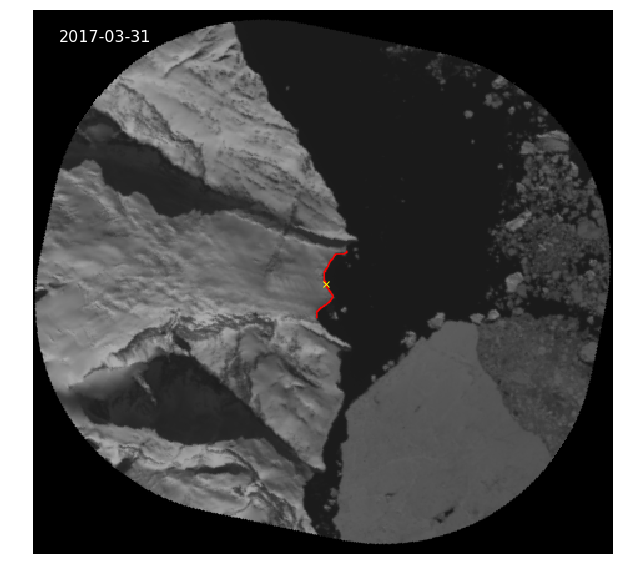

In [529]:
for index, row in dated_images_df.iterrows():
    imagename = row['Scene']
    dat = row['Dat_filename']
    trimdat = row['Trimmed_dat_filename']
    date = row['datetimes_x']
    midpoint_x = np.round_(float(row['Mid_X']))
    midpoint_y = np.round_(float(row['Mid_Y']))
        
#     if str(date) == '2013-11-13':
    if index == 112:
        if type(row['changerates']) == 'string':
            changerate = row['changerates']
        else:
            changerate = "%.1f" % float(row['changerates'])

        termposition = "%.1f" % float(row['xdist_leftmost'])

        #Read in image as np array
        image = mpimg.imread(imagepath+"crop_R_"+imagename+"_B8_PS_Buffer"+BOI+'.png')

        datpath = imagepath+"crop_R_"+imagename+"_B8_PS_Buffer"+BOI+".pgm_max_gaussian/"+metric        
#         dats = os.listdir(datpath)
        
        #Read in dat file as np array and grab x and y values
        term_trim_dat = np.loadtxt(datpath+trimdat)

        term_trim_xs = []
        term_trim_ys = []

        #grab x and y values for the terminus line
        for j in term_trim_dat:
    #         print(j)
            x, y = (j[0], j[1])
            term_trim_xs.append(x)
            term_trim_ys.append(y)

        plt.figure(figsize=(20,10))
    #     #PLOT DATE IN TOP LEFT CORNER!
        plt.text(20, 25, date, fontsize=16, color='w')
#         plt.text(400, 25, changerate, fontsize=16, color='w')
        imgplt_trim = plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

        #plot trimmed line and centroid in red
        plt.plot(term_trim_xs, term_trim_ys, c='red')
        plt.plot(midpoint_x, midpoint_y, color='yellow', marker='x')
        plt.axis("off")

#         plt.savefig(basepath+"Box"+BOI+"/Results/term_"+massorsize+"_trim_"+imagename+".png", dpi=500, bbox_inches='tight')
        plt.show()

### Plot terminus pick and centroid over each image

In [391]:
# for index, row in dated_images_df.iterrows():
#         imagename = row['Scene']
#         dat = row['Dat_filename']
#         trimdat = row['Trimmed_dat_filename']
#         date = row['datetimes_x']
#         midpoint_x = np.round_(float(row['Mid_X']))
#         midpoint_y = np.round_(float(row['Mid_Y']))

#         if type(row['changerates']) == 'string':
#             changerate = row['changerates']
#         else:
#             changerate = "%.1f" % float(row['changerates'])

#         termposition = "%.1f" % float(row['xdist_leftmost'])

#         #Read in image as np array
#         image = mpimg.imread(imagepath+"crop_R_"+imagename+"_B8_PS_Buffer"+BOI+'.png')

#         datpath = imagepath+"crop_R_"+imagename+"_B8_PS_Buffer"+BOI+".pgm_max_gaussian/"+metric

#         #Read in dat file as np array and grab x and y values
#         #TRIMMED:
#         term_trim_dat = np.loadtxt(datpath+trimdat)

# #         #ORIGINAL:
# #         term_dat = np.loadtxt(datpath+dat)

# #         #ORIGINAL
# #         term_xs = []
# #         term_ys = []

# #         #grab x and y values for the terminus line
# #         for j in term_dat:
# #             x, y = (j[0], j[1])
# #             term_xs.append(x)
# #             term_ys.append(y)

#         #TRIMMED
#         term_trim_xs = []
#         term_trim_ys = []

#         #grab x and y values for the terminus line
#         for j in term_trim_dat:
#     #         print(j)
#             x, y = (j[0], j[1])
#             term_trim_xs.append(x)
#             term_trim_ys.append(y)

#         plt.figure(figsize=(20,10))
#     #     #PLOT DATE IN TOP LEFT CORNER!
#         plt.text(20, 25, date, fontsize=16, color='w')
# #         plt.text(400, 25, changerate, fontsize=16, color='w')

#         imgplt_trim = plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

#         #plot trimmed line and centroid in red
#         plt.plot(term_trim_xs, term_trim_ys, c='red')
#         plt.plot(midpoint_x, midpoint_y, color='yellow', marker='x')

#         plt.axis("off")

# #         plt.savefig(basepath+"Box"+BOI+"/Results/term_"+massorsize+"_trim_"+imagename+".png", dpi=500, bbox_inches='tight')
#         plt.show()

#         sleep(1.5)
#         clear_output()


## Plot multiple terminus picks over 1 image with color scheme by date

In [415]:
# BOI = '174'
# #get list of images
# print("Box"+BOI)
# basepath = '/media/jukes/jukes1/LS8aws/'
# imagepath = basepath+"Box"+BOI+"/rotated/resized/"
# pathtoimgs = imagepath
# imgfiles = os.listdir(pathtoimgs)
# images = []
# term_dats = []
# imgnames = []

# for imgfile in imgfiles:
#     #grab image files and append to images list
#     if imgfile.endswith(BOI+".png"):
#         print(imgfile)
#         image = mpimg.imread(pathtoimgs+imgfile)
        
        
#         #grab dat files
#         pathtodat = pathtoimgs+imgfile[0:-4]+".pgm_max_gaussian/terminus_highestmass/"
#         datfiles = os.listdir(pathtodat)
        
#         #if there is a dat file:
#         if len(datfiles) > 0:
#             #grab the dat file and read it in and append to the list
#             for datfile in datfiles:
#                 if "trim" in datfile:
#                     term_dat = np.loadtxt(pathtodat+datfile)
#                     term_dats.append(term_dat)
# #                     print(term_dat.shape)
#                     #append the image name
#                     images.append(image)
#                     imgnames.append(imgfile)
#         else:
#             print("NO DAT FILE FOUND")
#     if imgfile.endswith("raster_cut.png"):
#         boxrasterfile = imgfile
#         print("Raster found for Box", BOI)
#         print(boxrasterfile)
# print(len(term_dats), len(images))

In [416]:
# imgfiles = os.listdir(pathtoimgs)
# imgplts = []
# names = []

# for imgfile in imgfiles:
#     if imgfile.endswith(BOI+'.png'):
#         imgname = imgfile
#         image = mpimg.imread(pathtoimgs+imgfile)
#         imgplts.append(image)
#         names.append(imgname[:-4]+".pgm")
        
# print(len(imgplts), len(names))

In [417]:
# index = 1

# metric = 'terminus_highestmass/'
# datpath = imagepath+names[index]+"_max_gaussian/"+metric 
# dats = os.listdir(datpath)
        
# for dat in dats:
#     if 'trim' in dat:
#         term_trim_dat = np.loadtxt(datpath+dat)
                
#         #TRIMMED
#         term_trim_xs = []
#         term_trim_ys = []

#         #grab x and y values for the terminus line
#         for j in term_trim_dat:
#             x, y = (j[0], j[1])
#             term_trim_xs.append(x)
#             term_trim_ys.append(y)

#         #CALCULATE CENTROIDS
#         trim_center_x, trim_center_y = centroid(term_trim_xs, term_trim_ys)
# #         print(trim_center_x)

# #PLOT DATE IN TOP LEFT CORNER!
# plt.figure(figsize=(20,10))
# plt.text(20, 25, date, fontsize=16, color='w')

# plt.imshow(cv2.cvtColor(imgplts[index], cv2.COLOR_BGR2RGB))
# plt.plot(term_trim_xs, term_trim_ys, c='red')
# plt.plot(trim_center_x, trim_center_y, color='yellow', marker='x')

# plt.axis("off")
# plt.axis("off")
# plt.show()

In [418]:
# # #imgplt = plt.imshow(images[40])
# # imgplt = plt.imshow(mpimg.imread('/home/jukes/Documents/Sample_glaciers/Box001/rotated_images/final/crop_PS_LC08_L1TP_031005_20180825_20180829_01_T1_B8_Buffer001cut.png'))
# imgplt = plt.imshow(cv2.cvtColor(imgplts[index], cv2.COLOR_BGR2RGB))
# final_imgnames = []

# xs = []
# ys = []
# for i in range(0, len(images)):
# #     print(i)
#     index = i
#     #imgplt = plt.imshow(images[index])#cv2.cvtColor(images[2], cv2.COLOR_BGR2RGB))\
#     avgpxval = np.average(images[index])
   
#     #if the pixel value is above a threshold, then grab the terminus
#     if avgpxval < 0.37:
#         final_imgnames.append(imgnames[index])
#         print(imgnames[index], "average pixel value:", avgpxval)
#         term = term_dats[index]
#         term_xs = []
#         term_ys = []

#         #grab x and y values for the terminus line
#         for j in term:
#             x, y = (j[0], j[1])
#             term_xs.append(x)
#             term_ys.append(y)
        
#         xs.append(term_xs)
#         ys.append(term_ys)

# #create dataframe with the term line coordinates and sort by date
# termlines_df = pd.DataFrame(
#     {'imgnames': final_imgnames,
#      'X': xs,
#      'Y': ys
#     })

# termlines_df = termlines_df.sort_values(by=['imgnames'])
# termlines_df.head()

# # #create reversed red color map for the lines
# n=len(termlines_df.index)
# print("Lines:", n)
# colors = pl.cm.Reds_r(np.linspace(0,1,n))
# col_count = 0

# name = list(termlines_df['imgnames'])
# x_final = list(termlines_df['X'])
# y_final = list(termlines_df['Y'])

# #plot each termline
# for a in range(0, n):
#     x, y = x_final[a], y_final[a]
#     pl.plot(x, y, color=colors[col_count], linewidth=1)
#     col_count = col_count+1

# plt.axis("off")

# plt.savefig('/home/jukes/Documents/Sample_glaciers/Termpicks_Box'+BOI+".png", dpi=2000, bbox_inches='tight')

# plt.show()
                     